In [60]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
pd.set_option('max_columns', 50)
import seaborn as sns

In [401]:
from IPython.display import HTML
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
wnba = pd.read_csv('wnba_clean.csv')

In [63]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0


In [ ]:
# Year	Champion	         Runner Up	           MVP
# 2019	Washington Mystics	 Connecticut Sun	   Emma Meesseman
# 2018	Seattle Storm	     Washington Mystics	   Breanna Stewart
# 2017	Minnesota Lynx	     Los Angeles Sparks	   Sylvia Fowles
# 2016	Los Angeles Sparks	 Minnesota Lynx	       Candace Parker
# 2015	Minnesota Lynx	     Indiana Fever	       Sylvia Fowles

In [ ]:
| Feature   | Description  |
|:---|:---|
| Name | Name  |
| Team | Team |
| Pos  | Position |
| Height  | Height  |
| Weight  |  Weight |
| BMI  | Body Mass Index |
| Birth_Place  | Birth place  |
| Birthdate  |  Birthdate |
| Age  |  Age |
| College  |  College |
| Experience  |  Experience |
| G | Games Played |
| MIN | Minutes Played |
| FGM | Field Goals Made |
| FGA | Field Goals Attempts |
| FG% | Field Goals % |
| 3PM | 3Points Made |
| 3PA | 3Points Attempts |
| 3P% | 3Points % |
| FTM | Free Throws made |
| FTA | Free Throws Attempts |
| FT% | Free Throws % |
| OREB | Offensive Rebounds |
| DREB | Defensive Rebounds |
| REB | Total Rebounds |
| AST | Assists |
| STL | Steals |
| BLK | Blocks |
| TO | Turnovers |
| PTS | Total points |
| DD2 | Double doubles |
| TD3 | Triple doubles |


Minnesota Lynx (MIN) is the champion of 2017, so we wanted to look further into this
how did they play this year, in comparison to their opponents?
to find out, we will look to the Total Points (PTS) and the correlation with player statistics



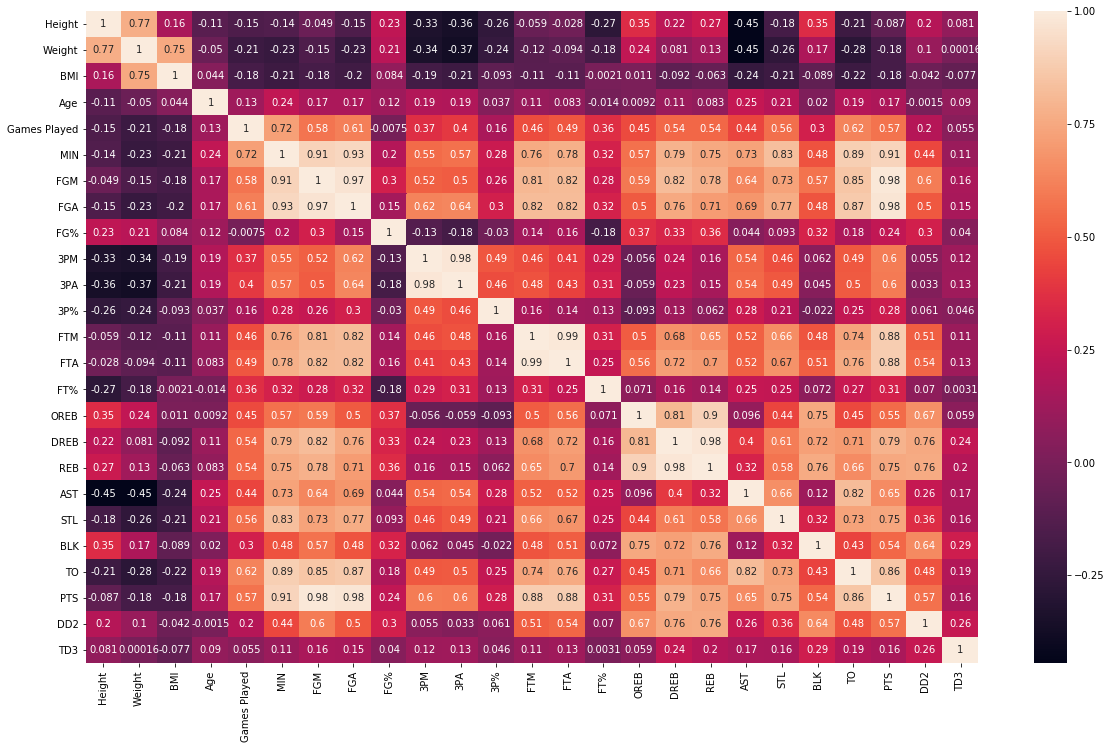

In [394]:
plt.figure(figsize = (20,12))
sns.heatmap(wnba.corr(), annot=True)

print(
"""
Minnesota Lynx (MIN) is the champion of 2017, so we wanted to look further into this
how did they play this year, in comparison to their opponents?
to find out, we will look to the Total Points (PTS) and the correlation with player statistics
"""
)



In [ ]:
"""
Looking at the correlation matrix, PTS is highly correlation with MIN, FGM, FGA, FTM, FTA, DREB, REB, STL
so we will compare these, because we will look at DREB and REB, we will also dive into OREB. 

In [395]:
print(
"""
so what are the strenghts and weaknesses of Minnosota Lynx, in comparison to their opponents?
"""
)


so what are the strenghts and weaknesses of Minnosota Lynx, in comparison to their opponents?



In [81]:
MIN = wnba.loc[wnba.Team == 'MIN']
MIN.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0
67,Jia Perkins,MIN,G,173,75,25.059307,US,"February 23, 1982",35,Texas Tech,14,30,932,178,420,42.4,47,123,38.2,114,134,85.1,24,72,96,103,41,11,83,517,0,0
88,Lindsay Whalen,MIN,G,175,78,25.469388,US,"September 5, 1982",34,Minnesota,14,22,520,69,153,45.1,12,34,35.3,27,36,75.0,8,46,54,90,11,2,44,177,0,0
93,Maya Moore,MIN,F,183,80,23.888441,US,"November 6, 1989",27,Connecticut,7,29,904,170,398,42.7,52,132,39.4,98,114,86.0,50,106,156,99,53,13,56,490,3,0
99,Natasha Howard,MIN,F,188,75,21.220009,US,"February 9, 1991",26,Florida State,4,29,315,48,104,46.2,3,13,23.1,17,23,73.9,25,38,63,16,11,19,20,116,0,0


In [163]:
opponents =  wnba.loc[wnba.Team != 'MIN']
opponents.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
5,Alexis Peterson,SEA,G,170,63,21.799308,US,"June 20, 1995",22,Syracuse,R,14,90,9,34,26.5,2,9,22.2,6,6,100.0,3,13,16,11,5,0,11,26,0,0


In [396]:
print(

"""
we start with looking at the relation of rebounds and the total points scored
"""
)


we start with looking at the relation of rebounds and the total points scored



In [372]:
print(f'Correlation Minnesota Team Total Points with Defensive Rebounds: ', MIN.PTS.corr(MIN.DREB))

Correlation Minnesota Team Total Points with Defensive Rebounds:  0.808346485628786


In [374]:
print(f'Correlation Opponents Total Points with Defensive Rebounds: ', opponents.PTS.corr(opponents.DREB))

Correlation Opponents Total Points with Defensive Rebounds:  0.7885853932045991


In [375]:
print(f'Correlation Minnesota Team Total Points with Offensive Rebounds: ', MIN.PTS.corr(MIN.OREB))

Correlation Minnesota Team Total Points with Offensive Rebounds:  0.7478856938118864


In [377]:
print(f'Correlation Opponents Total Points with Offensive Rebounds: ', opponents.PTS.corr(opponents.OREB))

Correlation Opponents Total Points with Offensive Rebounds:  0.5148346974260193


In [397]:
print(

"""
the correlation showes that there is a big difference in relation between the Minnesota team and all the other teams 
with offensive rebounds and total points, so Minnesota is likely to regain posession of the basketball after a missed 
shot be her team mate, 

looking at the relation, Minnesota is a lot better at scoring points with the offensive rebounds than ther opponents
"""
)


the correlation showes that there is a big difference in relation between the Minnesota team and all the other teams 
with offensive rebounds and total points, so Minnesota is likely to regain posession of the basketball after a missed 
shot be her team mate, 

looking at the relation, Minnesota is a lot better at scoring points with the offensive rebounds than ther opponents



In [381]:
print(f'Correlation Minnesota Team Total Points with Free Throws Attempts: ', MIN.PTS.corr(MIN.FTA))

Correlation Minnesota Team Total Points with Free Throws Attempts:  0.9602549327602711


In [382]:
print(f'Correlation Opponents Total Points with Free Throws Attempts: ', opponents.PTS.corr(opponents.FTA))

Correlation Opponents Total Points with Free Throws Attempts:  0.8714937569699848


In [398]:
print (

"""
The relation with Free Throws and scoring points is a lot stronger for Minnesota than with the other teams
A bit more than 80% of the free throws attemps are also free throws made, therefore the effect is probably so similar

Looking at the relation, Minnesota is a lot better at scoring points with the Free Throws than ther opponents
"""
)


The relation with Free Throws and scoring points is a lot stronger for Minnesota than with the other teams
A bit more than 80% of the free throws attemps are also free throws made, therefore the effect is probably so similar

Looking at the relation, Minnesota is a lot better at scoring points with the Free Throws than ther opponents



In [336]:
# MIN.FTM.sum() / MIN.FTA.sum() *100

In [383]:
print(f'Correlation Minnesota Team Total Points with Steals: ', MIN.PTS.corr(MIN.STL))

Correlation Minnesota Team Total Points with Steals:  0.9222077361848535


In [384]:
print(f'Correlation Opponents Total Points with Steals: ', opponents.PTS.corr(opponents.STL))

Correlation Opponents Total Points with Steals:  0.7201558705529414


In [385]:
print(f'Correlation Minnesota Team Total Points with Assists: ', MIN.PTS.corr(MIN.AST))

Correlation Minnesota Team Total Points with Assists:  0.5535652116018784


In [386]:
print(f'Correlation Opponents Total Points with Assists: ', opponents.PTS.corr(opponents.AST))

Correlation Opponents Total Points with Assists:  0.6580868038728097


In [399]:
print(
"""
Minessota is especially a lot better at stealing the ball and scoring points with this, in comparison to the opponents

However, they are particularly low at scoring points with assists, and as an assist is attributed to a player 
who passes the ball to a teammate in a way that leads to a score by field goal, this is not a very good sign of team
playing

"""
)


Minessota is especially a lot better at stealing the ball and scoring points with this, in comparison to the opponents

However, they are particularly low at scoring points with assists, and as an assist is attributed to a player 
who passes the ball to a teammate in a way that leads to a score by field goal, this is not a very good sign of team
playing




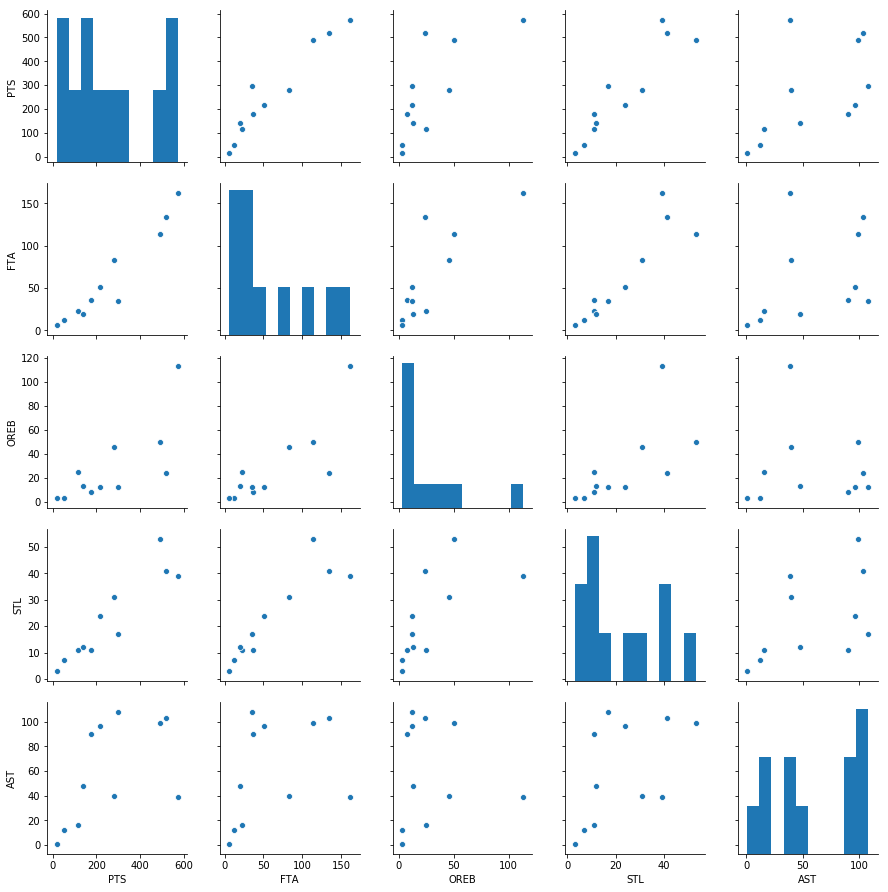

In [334]:
sns.pairplot(MIN, vars = ['PTS', 'FTA', 'OREB', 'STL', 'AST'])

/Users/michelle/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


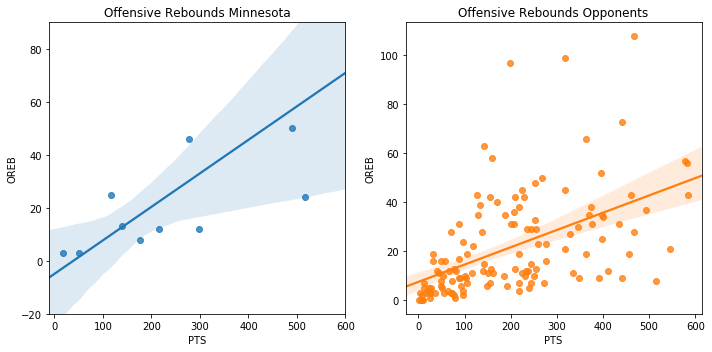

In [357]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize=(10, 5))

sns.regplot(x='PTS', y='OREB', data=MIN, ax=axes[0])
axes[0].set_title('Offensive Rebounds Minnesota')
axes[0].set(ylim=(-20, 90))

sns.regplot(x='PTS', y='OREB', data=opponents, ax=axes[1])
axes[1].set_title('Offensive Rebounds Opponents')

plt.tight_layout()

/Users/michelle/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


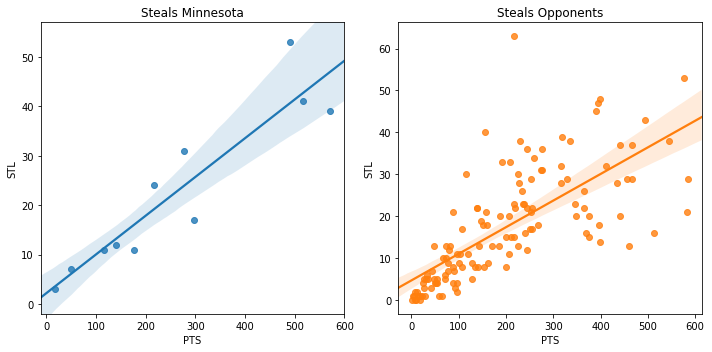

In [365]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))

sns.regplot(x='PTS', y='STL', data=MIN, ax=axes[0])
axes[0].set_title('Steals Minnesota')
axes[0].set(ylim=(-2, 57))

sns.regplot(x='PTS', y='STL', data=opponents, ax=axes[1])
axes[1].set_title('Steals Opponents')

plt.tight_layout()

/Users/michelle/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


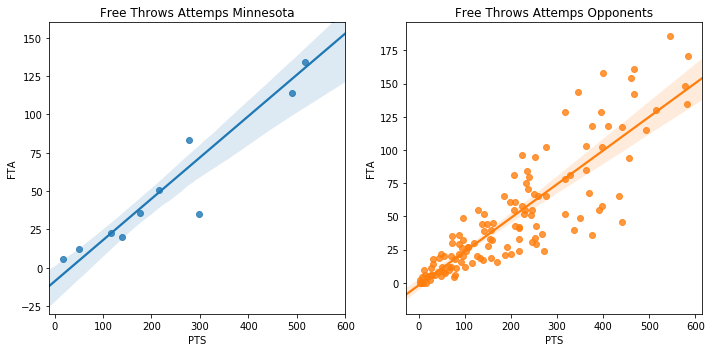

In [362]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))

sns.regplot(x='PTS', y='FTA', data=MIN, ax=axes[0])
axes[0].set_title('Free Throws Attemps Minnesota')
axes[0].set(ylim=(-30, 160))

sns.regplot(x='PTS', y='FTA', data=opponents, ax=axes[1])
axes[1].set_title('Free Throws Attemps Opponents')

plt.tight_layout()

/Users/michelle/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


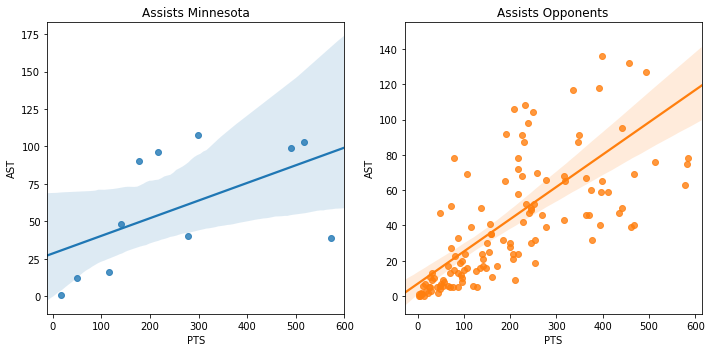

In [363]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))

sns.regplot(x='PTS', y='AST', data=MIN, ax=axes[0])
axes[0].set_title('Assists Minnesota')

sns.regplot(x='PTS', y='AST', data=opponents, ax=axes[1])
axes[1].set_title('Assists Opponents')
axes[1].set(ylim=(-10, 155))

plt.tight_layout()

In [400]:
print(

"""
So we can conclude from this that Minnesota gains relatively more total points from Offensive Rebounds, Free Throws, 
and Steals in comparison to their opponents, meaning this are their strenghts

However, they particulary gain less total points with Assists (their team players leading to a field goal), in 
comparison to their opponents

Assists could indicate stronger or less strong team playing skills, and as Minnesota definetely scores less points
on Assists compared to their opponents, but still won the Championship, we thought it was interesting to look further
into team effort versus star players

"""
)


So we can conclude from this that Minnesota gains relatively more total points from Offensive Rebounds, Free Throws, 
and Steals in comparison to their opponents, meaning this are their strenghts

However, they particulary gain less total points with Assists (their team players leading to a field goal), in 
comparison to their opponents

Assists could indicate stronger or less strong team playing skills, and as Minnesota definetely scores less points
on Assists compared to their opponents, but still won the Championship, we thought it was interesting to look further
into team effort versus star players




In [ ]:
"""
lied with statistics
plotting the correlations of Minnesota against their opponents, did not show a HUGE difference in plotting, even though
difference were between e.g. 0.50 and 0.74, this is because we plotted against opponents that also have a linear
relation, even though this relation is less strong, so by changing the range of the y axes, we found a way to 
visualize the difference a bit better ;)

"""

In [303]:
# correlation = wnba.groupby('Team')[['FTA', 'OREB', 'STL', 'AST', 'PTS']].sum()
# correlation

In [304]:
# correlation= correlation.drop('MIN', axis=0)
# correlation = correlation.transpose()
# correlation['Opponents'] = correlation.mean(axis=1)
# correlation
# correlation = correlation.transpose()
# correlation
# new_corr = correlation.append(MIN_corr)
# new_corr
# new_corr = new_corr.loc[['Opponents', 'MIN']]
# new_corr

In [305]:
# MIN_GROUP = wnba.groupby('Team')[['FTA', 'OREB', 'STL', 'AST', 'PTS']].sum()
# MIN_GROUP.drop([['ATL', 'CHI', 'CON', 'DAL', 'IND', 'LA', 'NY', 'PHO', 'SAN', 'SEA', 'WAS']], axis=0)
# MIN_corr = MIN_GROUP.loc[['MIN']]
# MIN_corr = MIN_corr.astype(float) 
# MIN_corr

In [306]:
# plt.figure(figsize = (20,12))
# sns.heatmap(wnba.groupby('Team')[['PTS','FTA', 'OREB', 'STL', 'AST']].corr(), annot=True)

In [307]:
# correlation = wnba.groupby('Team')[['FTA', 'OREB', 'STL', 'AST', 'PTS']].sum()
# correlation

In [308]:
# sns.catplot(x="Team", y='PTS',  kind="box", data=wnba)

In [335]:
# sns.pairplot(MIN, vars = ['PTS', 'FTA', 'OREB', 'STL', 'AST'])

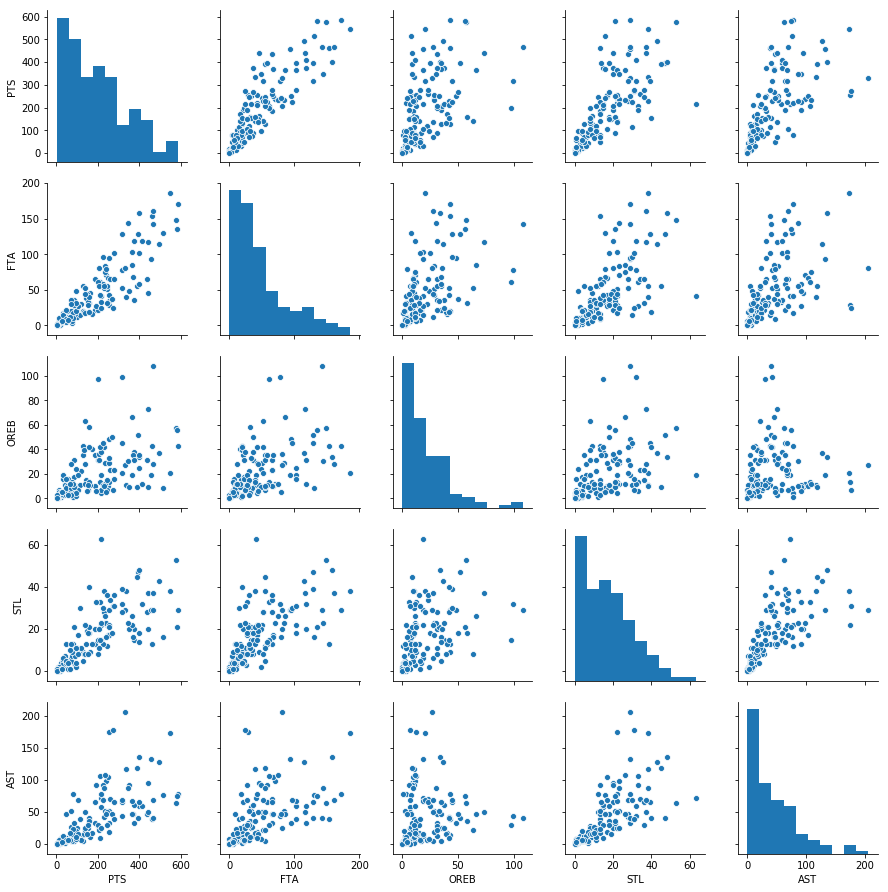

In [296]:
sns.pairplot(opponents, vars = ['PTS', 'FTA', 'OREB', 'STL', 'AST'])